# Driver code

In [1]:
# !pip install -U ipympl

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Raw_Data.bulk_and_open_system_model import get_plots_geometries, get_plots_3d
from sklearn.model_selection import train_test_split
import auxiliary_funcs as aux
from IPython.display import SVG

## Getting geometries plots

In [3]:
# Constants
flat_band_on_off = 0
N_band = 2
N = 1
alfa = 0.6
Nx = 24
Ny = Nx
X, Y = np.meshgrid(np.arange(0, Nx, 1), np.arange(0, Ny, 1))
hopping_range = 4
dk = 0.1
kx_vec = np.arange(-np.pi, np.pi, dk)

**Figure 2.1**

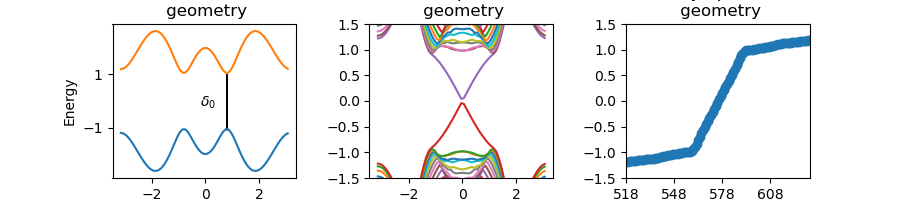

In [4]:
# mu and line_len can be modified to get figures from the tutorial
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Figure 2.2**

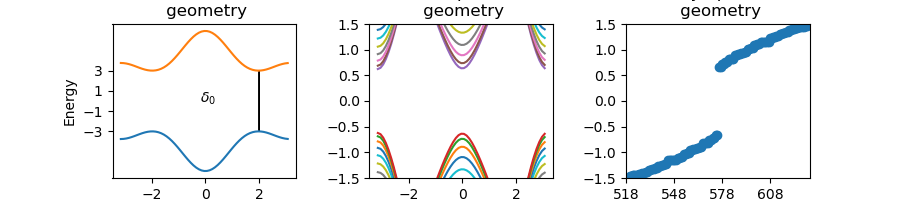

In [5]:
# mu and line_len can be modified to get figures from the tutorial
mu = 3
line_len = [2, -3, 0, 6]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Plot 3**

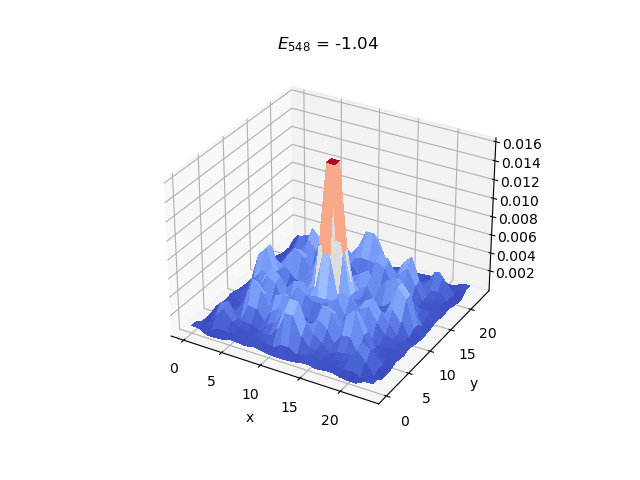

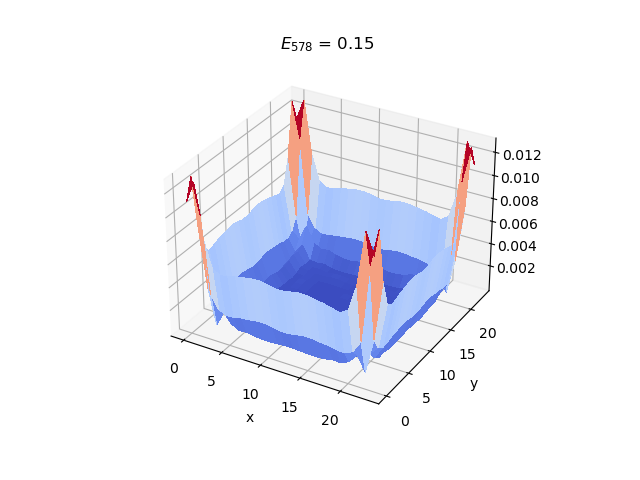

In [6]:
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_3d(Nx, Ny, hopping_range, parameters, X, Y)

## Getting data from Pandas and EDA

Reading data saved prevously

In [7]:
output = pd.read_pickle("Raw_Data/pandas_data_set_Shiba_data.pkl")

In [8]:
output.shape

(85570, 13)

We print first 20 rows of the DataFrame to get a sense of what can we encounter there

In [9]:
output.head(20)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,1.0,0.1,3.667,0.644,2.1947,0.0,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,24.0,1.0,2.0,0.1,3.667,0.644,2.1947,0.1,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,24.0,1.0,3.0,0.1,3.667,0.644,2.1947,0.2,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,4.0,0.1,3.667,0.644,2.1947,0.3,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,24.0,1.0,5.0,0.1,3.667,0.644,2.1947,0.4,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,24.0,1.0,6.0,0.1,3.667,0.644,2.1947,0.5,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,24.0,1.0,7.0,0.1,3.667,0.644,2.1947,0.6,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,24.0,1.0,8.0,0.1,3.667,0.644,2.1947,0.7,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,24.0,1.0,9.0,0.1,3.667,0.644,2.1947,0.8,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,24.0,1.0,10.0,0.1,3.667,0.644,2.1947,0.9,0.0,0.0,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


We can see that even though the bulk chern marker groups have even counts, their dispersions are not even. Group with bulk chern marker 2 is much more dispersed than the other three. We may have slight suspisions that it might be the hardest to spot for the NN later on.

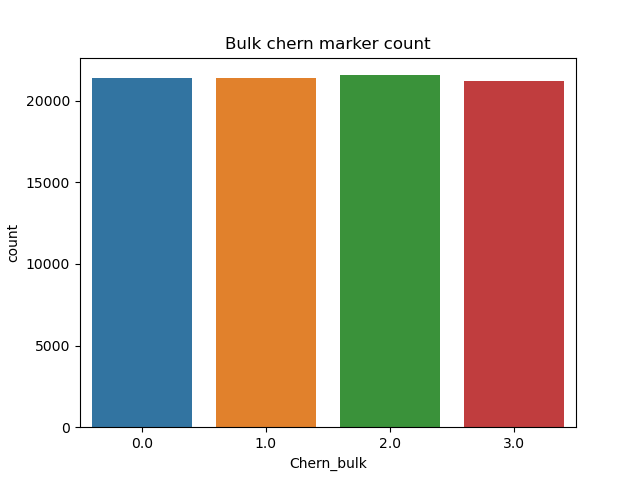

In [10]:
plt.figure()
plt.title("Bulk chern marker count")
sns.countplot(x=output["Chern_bulk"])
plt.show()

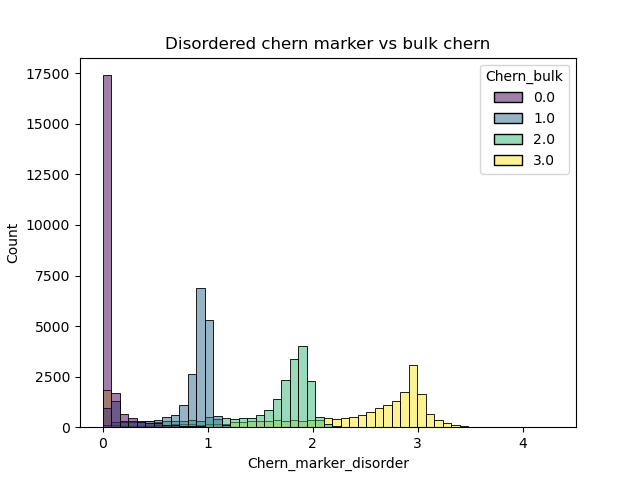

In [11]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()


We set *train* and *test* data sets by train-test-split from sklearn's model selection module with shuffle option enabled
*test* dataset size will be 20% of the raw dataset. Train dataset will be further processed for fine-tuning the model, while the test dataset will be left as is.

In [12]:
test_proc = 0.1
X_train, X_test = train_test_split(output, test_size=test_proc, shuffle=True, stratify=output["Chern_bulk"])
print("Shape of the raw data is ", output.shape)
print("Shape of the train data is ", X_train.shape, ", and of the test data ", X_test.shape)

Shape of the raw data is  (85570, 13)
Shape of the train data is  (77013, 13) , and of the test data  (8557, 13)


Now we would like to make our train data linearly separable for the NN, so we transfrom them the way to eliminate the overlaps seen on the plot above

Here we can see that after first step of normalization (setting $V_0 < 1$) we already went down from $68456$ samples to $\sim 32600$ samples (exact number varies due to shuffling done during split)

In [13]:
X_train = X_train.loc[X_train["v_sample"] < 1]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(36659, 13)

In [14]:
X_train.head(5)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,24579.0,0.1,2.000,0.050,2.0010,0.8,1.0,0.999,1.070,10.0,"[0.06047743146243162, 0.0056231446727654545, 0..."
1,24.0,3.0,45177.0,0.1,-2.667,0.327,1.6902,0.5,3.0,2.962,2.759,6.0,"[0.0017599542715058577, 0.003387220451371159, ..."
2,24.0,1.0,57714.0,0.1,3.333,0.565,2.1595,0.5,0.0,0.000,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,83815.0,0.1,-1.333,0.169,1.9808,0.3,1.0,0.981,1.009,6.0,"[0.02935554483071295, 0.010505299224625638, 0...."
4,24.0,3.0,32009.0,0.1,0.333,0.248,1.1991,0.4,3.0,2.929,2.861,26.0,"[0.02260540191353547, 0.005694082708208799, 0...."


Now let's apply second normalization condition, that is $|C - C_m| < 0.5$

In [15]:
X_train["|C-C_m|"] = X_train["Chern_bulk"] - X_train["Chern_marker_disorder"]

In [16]:
X_train.head(30)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS,|C-C_m|
0,24.0,1.0,24579.0,0.1,2.000,0.050,2.0010,0.8,1.0,0.999,1.070,10.0,"[0.06047743146243162, 0.0056231446727654545, 0...",-0.070
1,24.0,3.0,45177.0,0.1,-2.667,0.327,1.6902,0.5,3.0,2.962,2.759,6.0,"[0.0017599542715058577, 0.003387220451371159, ...",0.241
2,24.0,1.0,57714.0,0.1,3.333,0.565,2.1595,0.5,0.0,0.000,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.001
3,24.0,1.0,83815.0,0.1,-1.333,0.169,1.9808,0.3,1.0,0.981,1.009,6.0,"[0.02935554483071295, 0.010505299224625638, 0....",-0.009
4,24.0,3.0,32009.0,0.1,0.333,0.248,1.1991,0.4,3.0,2.929,2.861,26.0,"[0.02260540191353547, 0.005694082708208799, 0....",0.139
5,24.0,1.0,43351.0,0.1,-2.667,0.327,1.6902,0.6,1.0,0.978,0.969,6.0,"[0.004854197454481176, 0.016303838012704196, 0...",0.031
6,24.0,3.0,60062.0,0.1,-1.667,0.683,0.4000,0.1,3.0,2.942,2.934,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.066
7,24.0,3.0,22076.0,0.1,-3.667,0.485,0.6673,0.4,3.0,1.611,1.675,2.0,"[7.82106294978092e-05, 0.0002742469805847843, ...",1.325
8,24.0,1.0,51669.0,0.1,-1.667,0.723,0.2333,0.8,2.0,1.318,1.308,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.692
9,24.0,1.0,44168.0,0.1,-3.667,0.327,0.6698,0.4,1.0,0.921,0.900,2.0,"[0.0004796752878614305, 0.0010999730862173995,...",0.100


In [17]:
X_train = X_train.loc[X_train["|C-C_m|"] < 0.5]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(32484, 14)

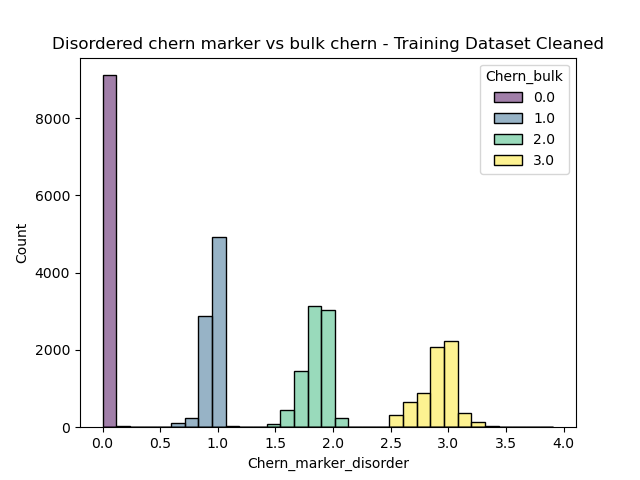

In [18]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern - Training Dataset Cleaned")
sns.histplot(X_train, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()

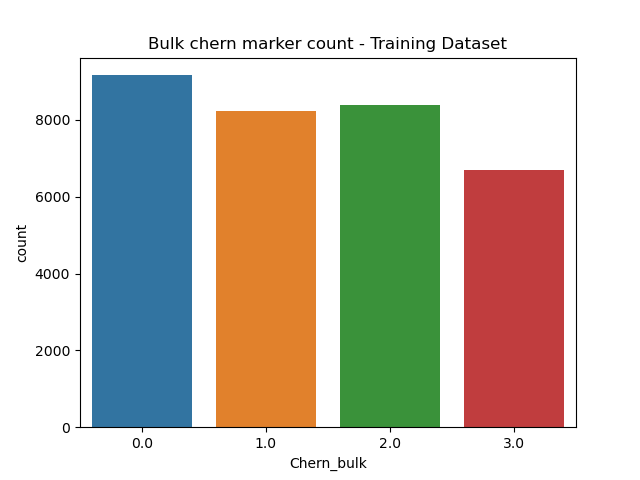

In [19]:
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
plt.figure()
plt.title("Bulk chern marker count - Training Dataset")
sns.countplot(x=X_train["Chern_bulk"])
plt.show()

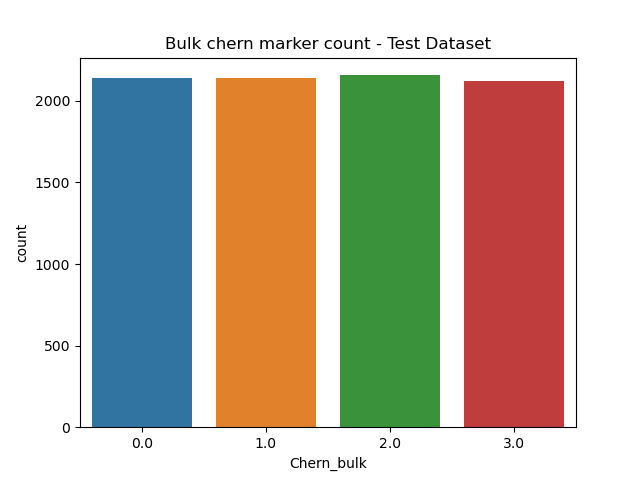

In [20]:
plt.figure()
plt.title("Bulk chern marker count - Test Dataset")
sns.countplot(x=X_test["Chern_bulk"])
plt.show()

After all the steps of data cleaning we are good to split it into *training dataset* and the *validation dataset* we will use to train our CNN. But first we need to drop all the unnecessary columns in both Training and Test dataset, as our CNN will be learning to recognise images (24x24 matrices) of LDOS, with *one-hot-encoded* Bulk Chern Numbers $|C_n|$ as labels.

**NOTE**
    If possible rerun the raw data genration for lattice 34x34, and 10 000 samples. To be seen. I.E. How big of a system would you need to get Chern 4, or 5

In [21]:
X_train = X_train.loc[:, ["LDOS","Chern_bulk"]]
X_test = X_test.loc[:, ["LDOS","Chern_bulk"]]

In [22]:
X_train.head(12)

,LDOS,Chern_bulk
0,"[0.06047743146243162, 0.0056231446727654545, 0...",1.0
1,"[0.0017599542715058577, 0.003387220451371159, ...",3.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,"[0.02935554483071295, 0.010505299224625638, 0....",1.0
4,"[0.02260540191353547, 0.005694082708208799, 0....",3.0
5,"[0.004854197454481176, 0.016303838012704196, 0...",1.0
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.0
7,"[0.0004796752878614305, 0.0010999730862173995,...",1.0
8,"[0.0030796675188313415, 0.003357760375061594, ...",2.0
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0


When we print out the first element, we see that it has desired length, as $24\cdot24 = 576$

In [23]:
X_train.iloc[0]["LDOS"].shape

(576,)

We can interpret these matrices as images, like the ones pictured below

Add second row with V_0 = 0. To this plots add disroder >1. Then $C_M$ =0 can giv ebulk states. Look for this, and maybe extract the data for reproducibility of figures

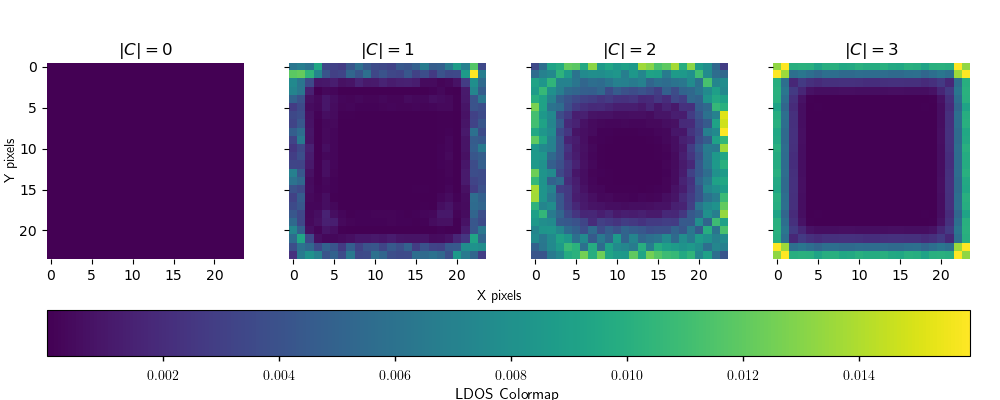

In [24]:
aux.get_figure_repr_1(X_train)

We can now clean the test data from the unnecesary columns, and split it in data and labels

In [25]:
X_test, Y_test = X_test["LDOS"], X_test["Chern_bulk"]
X_train, Y_train = X_train["LDOS"], X_train["Chern_bulk"]

Now we can split the training data into real training dataset and validation dataset, along with splitting the labels

We can check dimensionality just in case

In [26]:
print("Shapes of X_train data: {}, Y_train labels: {}".format(X_train.shape, Y_train.shape))
print("Shapes of X_test data: {}, Y_test labels: {}".format(X_test.shape, Y_test.shape))

Shapes of X_train data: (32484,), Y_train labels: (32484,)
Shapes of X_test data: (8557,), Y_test labels: (8557,)


Now let's normalize the data

In [27]:
X_train

0        [0.06047743146243162, 0.0056231446727654545, 0...
1        [0.0017599542715058577, 0.003387220451371159, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.02935554483071295, 0.010505299224625638, 0....
4        [0.02260540191353547, 0.005694082708208799, 0....
                               ...                        
32479    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
32480    [0.04621921106887741, 0.052923849537691546, 0....
32481    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
32482    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
32483    [0.0022914712560918983, 0.004858530777032215, ...
Name: LDOS, Length: 32484, dtype: object

In [28]:
X_train = X_train.to_list()
X_test = X_test.to_list()

Retrain the models

In [29]:
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-07 02:35:46.146695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-07 02:35:46.146877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
X_train = tf.reshape(X_train, [-1, 24,24, 1])
X_test = tf.reshape(X_test, [-1, 24,24, 1])

In [31]:
Y_train = tf.cast(Y_train, "int32")
Y_test = tf.cast(Y_test, "int32")

In [32]:
depth = 4

Y_train = tf.one_hot(Y_train, depth)
Y_test = tf.one_hot(Y_test, depth)

And **NOW** we can get into creating and training a CNN model

In [33]:
Y_train

<tf.Tensor: shape=(32484, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

## Setting up a CNN model

In [34]:
def getModelWithRegularisation(
        nFilters,
        kernel_size,
        pool_size,
        nNeurons,
        nHiddenLayers,
        dropout_rate,
        l2_lambda,
        inputShape,
        outputWidth,
):
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    for iHidden in range(nHiddenLayers):
        x = tf.keras.layers.Conv2D(
            filters=nFilters,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda),
        )(x)
        #         x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.activations.relu(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(
        nNeurons,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.l2(l2_lambda),
    )(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

In [35]:
def getModelA(
    nFilters,
    nNeurons,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(nNeurons, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dense(nNeurons//2, activation=tf.nn.relu)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [36]:
def getModelB(
    nFilters,
    kernel_size,
    pool_size,
    nHiddenLayers,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    for iHidden in range(nHiddenLayers):   
        x = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=kernel_size, activation=tf.nn.relu)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [37]:
def getModelC(
    nFilters,
    kernel_size,
    pool_size,
    nHiddenLayers,
    dropout_rate,
    inputShape,
    outputWidth,
    ):
    
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    for iHidden in range(nHiddenLayers):   
        x = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=kernel_size, activation=tf.nn.relu)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=2)(x)
        x = tf.keras.layers.Conv2D(filters=nFilters//2, kernel_size=kernel_size, activation=tf.nn.relu)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(
        loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy']
    )
    return model

In [38]:
verb=1
dropout_rate = 0.5
l2_lambda = 0.001
epochs = 100
batch_size = 256
nFilters = 64
kernel_size = 3
pool_size = (2,2)
nNeurons = 256
nHiddenLayers = 1
inputShape = (24, 24, 1)
outputWidth = 4

In [39]:
# %%time

# model_primo = getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth)

# model_primo_fit = model_primo.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=verb, use_multiprocessing=True, validation_split=0.15, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

In [40]:
%%time

model_A = getModelA(nFilters, nNeurons, dropout_rate, inputShape, outputWidth)

model_A_fit = model_A.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=verb, use_multiprocessing=True, validation_split=0.15)

2022-04-07 02:35:47.582656: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100
  6/108 [>.............................] - ETA: 1s - loss: 1.3859 - accuracy: 0.2467 

2022-04-07 02:35:47.819693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 1.3822 - accuracy: 0.2770

2022-04-07 02:35:48.853018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 2s 11ms/step - loss: 1.3822 - accuracy: 0.2770 - val_loss: 1.3776 - val_accuracy: 0.2879
Epoch 2/100
108/108 [==============================] - 1s 10ms/step - loss: 1.3808 - accuracy: 0.2811 - val_loss: 1.3768 - val_accuracy: 0.2879
Epoch 3/100
108/108 [==============================] - 1s 9ms/step - loss: 1.3802 - accuracy: 0.2810 - val_loss: 1.3761 - val_accuracy: 0.2879
Epoch 4/100
108/108 [==============================] - 1s 9ms/step - loss: 1.3790 - accuracy: 0.2810 - val_loss: 1.3733 - val_accuracy: 0.2879
Epoch 5/100
108/108 [==============================] - 1s 9ms/step - loss: 1.3693 - accuracy: 0.2999 - val_loss: 1.3478 - val_accuracy: 0.2879
Epoch 6/100
108/108 [==============================] - 1s 8ms/step - loss: 1.2841 - accuracy: 0.4432 - val_loss: 1.1680 - val_accuracy: 0.5520
Epoch 7/100
108/108 [==============================] - 1s 8ms/step - loss: 1.0599 - accuracy: 0.5227 - val_loss: 0.9391 - val_accuracy: 0.5512
Epoch 8/1

Epoch 58/100
108/108 [==============================] - 2s 14ms/step - loss: 0.7935 - accuracy: 0.5927 - val_loss: 0.7753 - val_accuracy: 0.6082
Epoch 59/100
108/108 [==============================] - 2s 15ms/step - loss: 0.7918 - accuracy: 0.5995 - val_loss: 0.7784 - val_accuracy: 0.6035
Epoch 60/100
108/108 [==============================] - 2s 17ms/step - loss: 0.7900 - accuracy: 0.5987 - val_loss: 0.7640 - val_accuracy: 0.5910
Epoch 61/100
108/108 [==============================] - 1s 13ms/step - loss: 0.7858 - accuracy: 0.6053 - val_loss: 0.7655 - val_accuracy: 0.6144
Epoch 62/100
108/108 [==============================] - 1s 11ms/step - loss: 0.7873 - accuracy: 0.6044 - val_loss: 0.7608 - val_accuracy: 0.6013
Epoch 63/100
108/108 [==============================] - 1s 13ms/step - loss: 0.7931 - accuracy: 0.6016 - val_loss: 0.7731 - val_accuracy: 0.6493
Epoch 64/100
108/108 [==============================] - 2s 20ms/step - loss: 0.7833 - accuracy: 0.6083 - val_loss: 0.7558 - val_ac

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 24, 1)]       0         
                                                                 
 rescaling (Rescaling)       (None, 24, 24, 1)         0         
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 256)               147712    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 516   

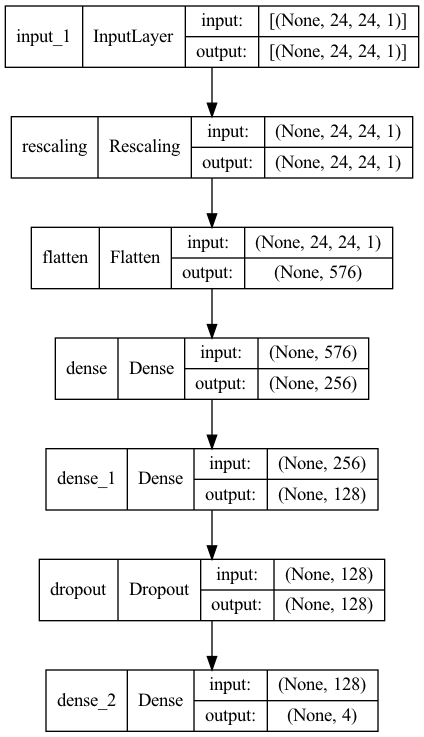

In [41]:
model_A.summary()
tf.keras.utils.plot_model(model_A, 'ML_model_A.png', show_shapes=True)

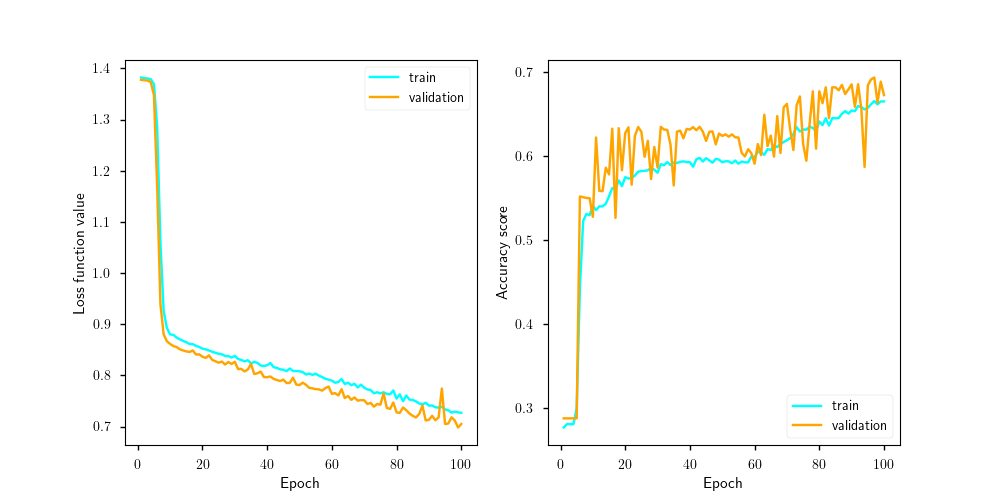

2022-04-07 02:38:27.779595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.51      0.99      0.68      2141
           1       0.33      0.18      0.23      2138
           2       0.43      0.52      0.47      2157
           3       0.70      0.21      0.33      2121

    accuracy                           0.48      8557
   macro avg       0.49      0.48      0.43      8557
weighted avg       0.49      0.48      0.43      8557

[[2129    6    6    0]
 [ 541  382 1032  183]
 [ 728  298 1124    7]
 [ 761  467  441  452]]
51.190189949507094
33.13096270598439
43.1809450633884
70.40498442367601


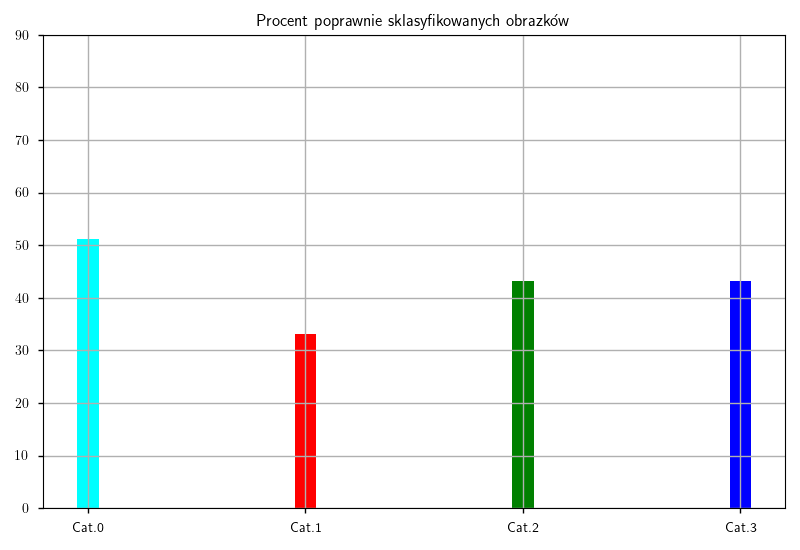

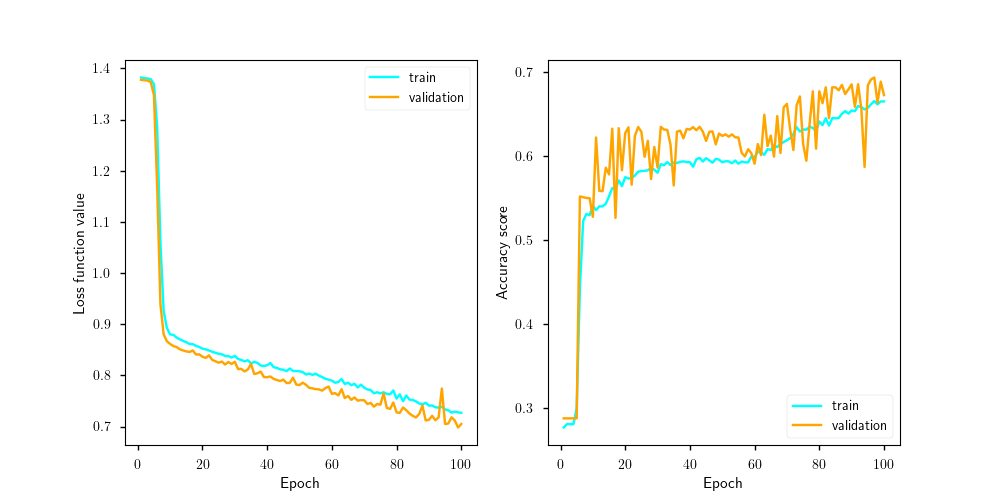

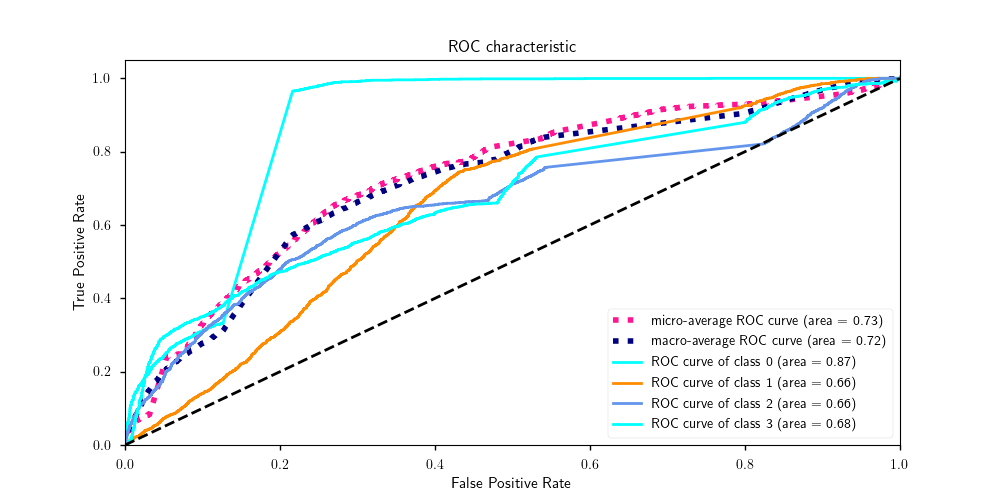

In [42]:
aux.plotTrainingHistory(model_A_fit)
aux.printScores(model_A, X_test,  Y_test)
aux.plotHistScores(model_A, X_test,  Y_test)
ROC_1 = aux.roc_auc(model_A, X_test,  Y_test, title="ROC characteristic")

### Model B

In [43]:
%%time

model_B = getModelB(nFilters, kernel_size, pool_size, nHiddenLayers, dropout_rate, inputShape, outputWidth,)

model_B_fit = model_B.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=verb, use_multiprocessing=True, validation_split=0.15)

Epoch 1/100


2022-04-07 02:38:35.736380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 1.3819 - accuracy: 0.2806

2022-04-07 02:38:39.400370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 4s 34ms/step - loss: 1.3819 - accuracy: 0.2806 - val_loss: 1.3787 - val_accuracy: 0.2879
Epoch 2/100
108/108 [==============================] - 4s 34ms/step - loss: 1.3809 - accuracy: 0.2810 - val_loss: 1.3767 - val_accuracy: 0.2879
Epoch 3/100
108/108 [==============================] - 6s 53ms/step - loss: 1.3811 - accuracy: 0.2804 - val_loss: 1.3771 - val_accuracy: 0.2879
Epoch 4/100
108/108 [==============================] - 5s 44ms/step - loss: 1.3809 - accuracy: 0.2810 - val_loss: 1.3783 - val_accuracy: 0.2879
Epoch 5/100
108/108 [==============================] - 3s 27ms/step - loss: 1.3811 - accuracy: 0.2810 - val_loss: 1.3769 - val_accuracy: 0.2879
Epoch 6/100
108/108 [==============================] - 3s 28ms/step - loss: 1.3811 - accuracy: 0.2810 - val_loss: 1.3777 - val_accuracy: 0.2879
Epoch 7/100
108/108 [==============================] - 3s 30ms/step - loss: 1.3809 - accuracy: 0.2810 - val_loss: 1.3776 - val_accuracy: 0.2879
Epoc

108/108 [==============================] - 3s 23ms/step - loss: 1.3773 - accuracy: 0.2810 - val_loss: 1.3735 - val_accuracy: 0.2879
Epoch 58/100
108/108 [==============================] - 3s 25ms/step - loss: 1.3772 - accuracy: 0.2824 - val_loss: 1.3734 - val_accuracy: 0.2879
Epoch 59/100
108/108 [==============================] - 3s 23ms/step - loss: 1.3768 - accuracy: 0.2810 - val_loss: 1.3731 - val_accuracy: 0.2879
Epoch 60/100
108/108 [==============================] - 2s 21ms/step - loss: 1.3767 - accuracy: 0.2820 - val_loss: 1.3731 - val_accuracy: 0.2879
Epoch 61/100
108/108 [==============================] - 3s 24ms/step - loss: 1.3763 - accuracy: 0.2837 - val_loss: 1.3725 - val_accuracy: 0.2879
Epoch 62/100
108/108 [==============================] - 3s 25ms/step - loss: 1.3759 - accuracy: 0.2854 - val_loss: 1.3721 - val_accuracy: 0.2879
Epoch 63/100
108/108 [==============================] - 3s 29ms/step - loss: 1.3753 - accuracy: 0.2861 - val_loss: 1.3720 - val_accuracy: 0.287

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24, 24, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 24, 24, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 22, 22, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dropout_1 (Dropout)         (None, 7744)              0         
                                                           

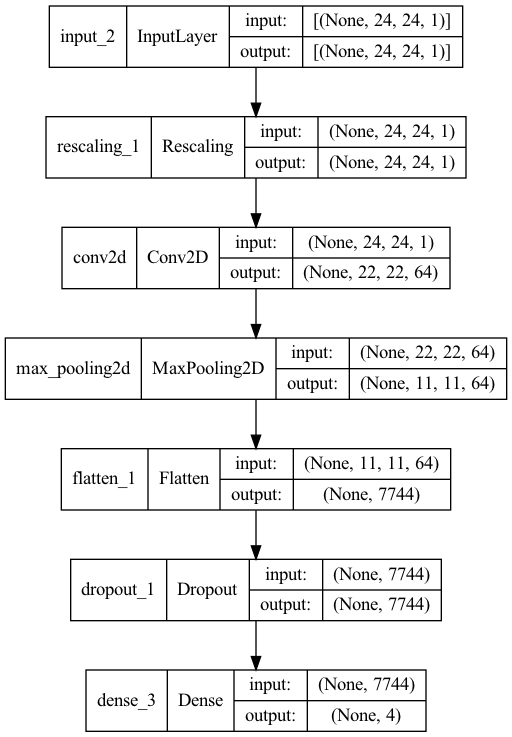

In [44]:
model_B.summary()
tf.keras.utils.plot_model(model_B, 'ML_model_B.png', show_shapes=True)

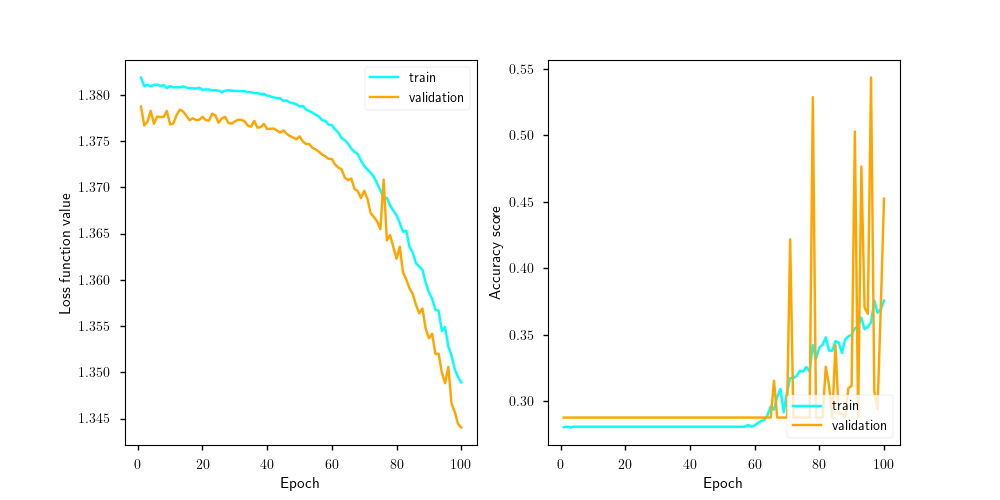

2022-04-07 02:43:05.580843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined 

              precision    recall  f1-score   support

           0       0.44      1.00      0.61      2141
           1       0.00      0.00      0.00      2138
           2       0.30      0.52      0.38      2157
           3       0.00      0.00      0.00      2121

    accuracy                           0.38      8557
   macro avg       0.19      0.38      0.25      8557
weighted avg       0.19      0.38      0.25      8557

[[2133    0    8    0]
 [1029    0 1109    0]
 [1039    0 1118    0]
 [ 677    0 1444    0]]
43.7269372693727
nan
30.3886925795053
nan


/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:125: RuntimeWarning: invalid value encountered in long_scalars
  proc_1 = data[1].to_numpy()[1] / data[1].to_numpy().sum() * 100
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:131: RuntimeWarning: invalid value encountered in long_scalars
  proc_3 = data[3].to_numpy()[3] / data[3].to_numpy().sum() * 100


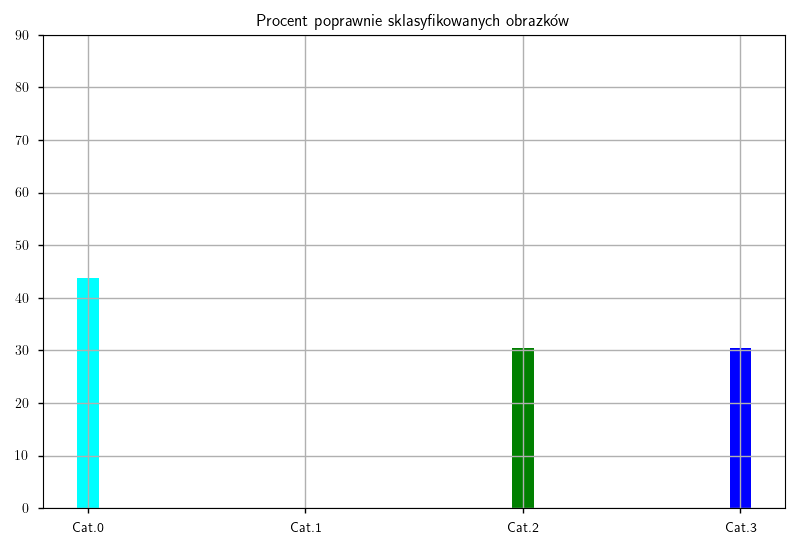

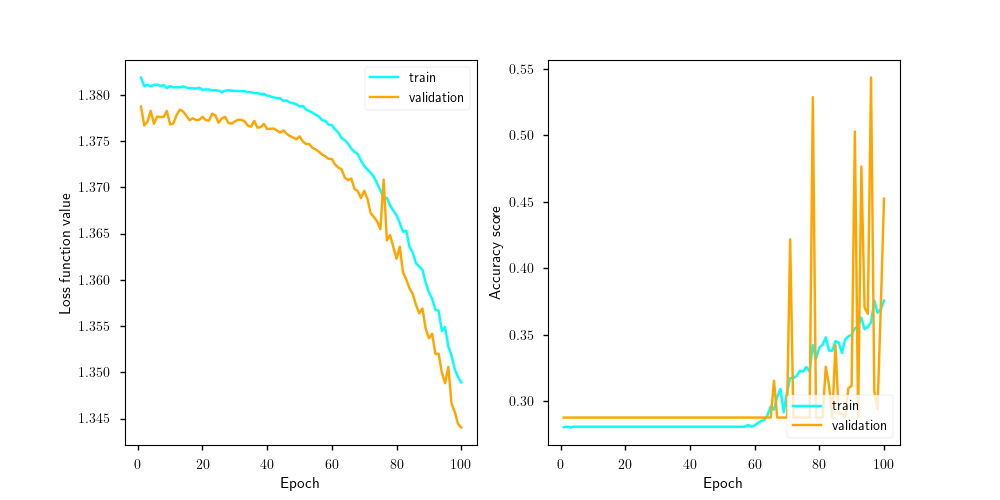

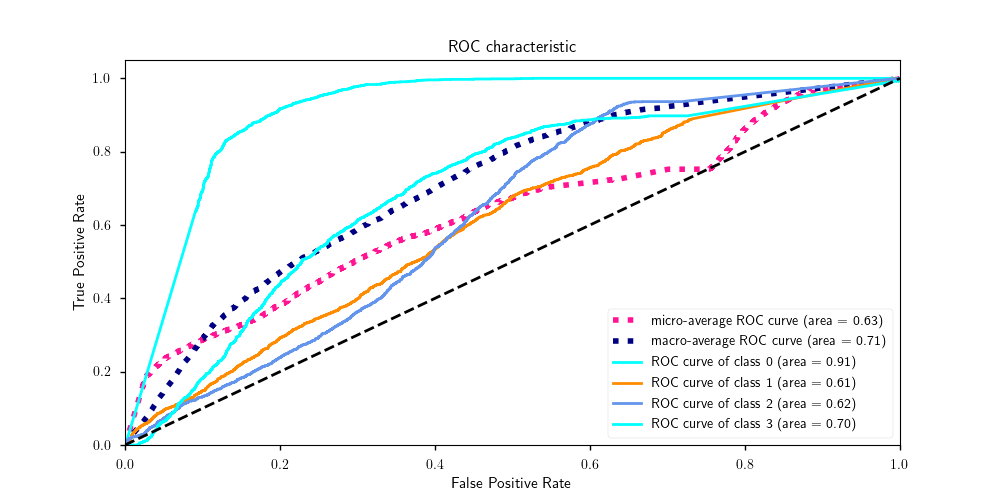

In [45]:
aux.plotTrainingHistory(model_B_fit)
aux.printScores(model_B, X_test,  Y_test)
aux.plotHistScores(model_B, X_test,  Y_test)
ROC_1 = aux.roc_auc(model_B, X_test,  Y_test, title="ROC characteristic")

### Model C

In [46]:
%%time

model_C = getModelC(nFilters, kernel_size, pool_size, nHiddenLayers, dropout_rate, inputShape, outputWidth,)

model_C_fit = model_C.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test), verbose=verb, use_multiprocessing=True, validation_split=0.15)

Epoch 1/100
  3/108 [..............................] - ETA: 3s - loss: 1.3862 - accuracy: 0.3320 

2022-04-07 02:43:09.347908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - ETA: 0s - loss: 1.3821 - accuracy: 0.2779

2022-04-07 02:43:12.098407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


108/108 [==============================] - 3s 27ms/step - loss: 1.3821 - accuracy: 0.2779 - val_loss: 1.3793 - val_accuracy: 0.2879
Epoch 2/100
108/108 [==============================] - 3s 24ms/step - loss: 1.3811 - accuracy: 0.2809 - val_loss: 1.3771 - val_accuracy: 0.2879
Epoch 3/100
108/108 [==============================] - 3s 28ms/step - loss: 1.3812 - accuracy: 0.2810 - val_loss: 1.3772 - val_accuracy: 0.2879
Epoch 4/100
108/108 [==============================] - 2s 22ms/step - loss: 1.3809 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.2879
Epoch 5/100
108/108 [==============================] - 2s 21ms/step - loss: 1.3808 - accuracy: 0.2810 - val_loss: 1.3771 - val_accuracy: 0.2879
Epoch 6/100
108/108 [==============================] - 2s 21ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3785 - val_accuracy: 0.2879
Epoch 7/100
108/108 [==============================] - 2s 22ms/step - loss: 1.3810 - accuracy: 0.2810 - val_loss: 1.3775 - val_accuracy: 0.2879
Epoc

108/108 [==============================] - 3s 30ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.2879
Epoch 58/100
108/108 [==============================] - 4s 39ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3772 - val_accuracy: 0.2879
Epoch 59/100
108/108 [==============================] - 4s 37ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.2879
Epoch 60/100
108/108 [==============================] - 3s 23ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3772 - val_accuracy: 0.2879
Epoch 61/100
108/108 [==============================] - 2s 23ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.2879
Epoch 62/100
108/108 [==============================] - 2s 23ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.2879
Epoch 63/100
108/108 [==============================] - 2s 22ms/step - loss: 1.3807 - accuracy: 0.2810 - val_loss: 1.3773 - val_accuracy: 0.287

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 24, 24, 1)]       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 24, 24, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                       

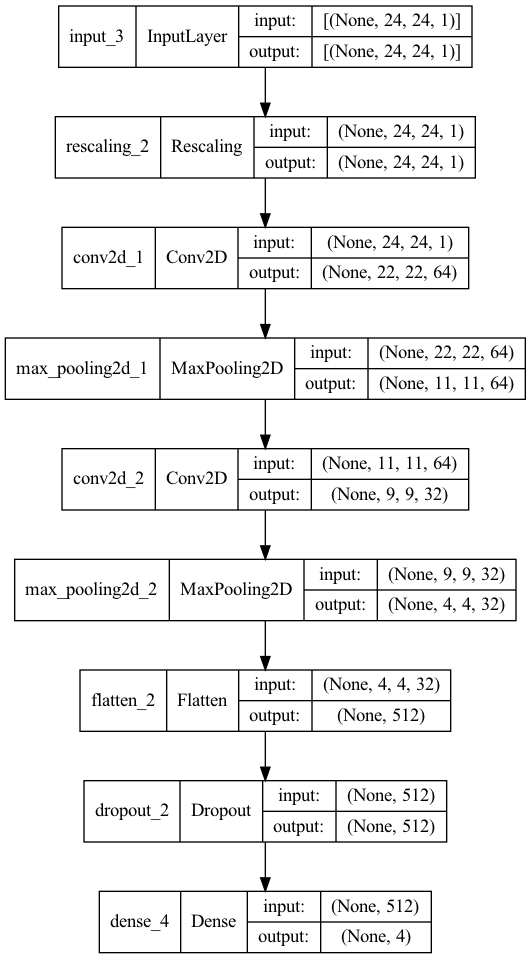

In [47]:
model_C.summary()
tf.keras.utils.plot_model(model_C, 'ML_model_C.png', show_shapes=True)

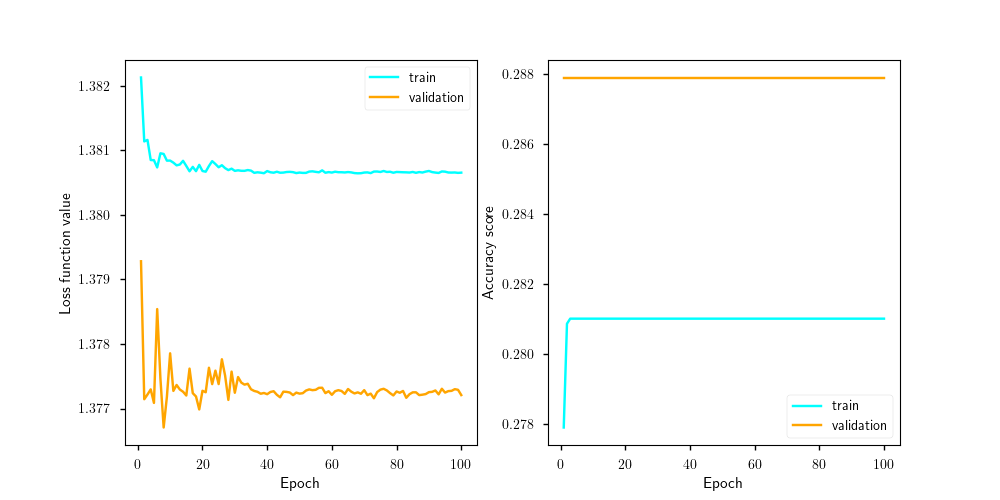

2022-04-07 02:47:55.907969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/k4cp3rskiii/miniforge3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined 

              precision    recall  f1-score   support

           0       0.25      1.00      0.40      2141
           1       0.00      0.00      0.00      2138
           2       0.00      0.00      0.00      2157
           3       0.00      0.00      0.00      2121

    accuracy                           0.25      8557
   macro avg       0.06      0.25      0.10      8557
weighted avg       0.06      0.25      0.10      8557

[[2141    0    0    0]
 [2138    0    0    0]
 [2157    0    0    0]
 [2121    0    0    0]]
25.020451092672662
nan
nan
nan


/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:125: RuntimeWarning: invalid value encountered in long_scalars
  proc_1 = data[1].to_numpy()[1] / data[1].to_numpy().sum() * 100
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:128: RuntimeWarning: invalid value encountered in long_scalars
  proc_2 = data[2].to_numpy()[2] / data[2].to_numpy().sum() * 100
/Users/k4cp3rskiii/Library/Mobile Documents/com~apple~CloudDocs/MISMaP/Topo_ML/auxiliary_funcs.py:131: RuntimeWarning: invalid value encountered in long_scalars
  proc_3 = data[3].to_numpy()[3] / data[3].to_numpy().sum() * 100


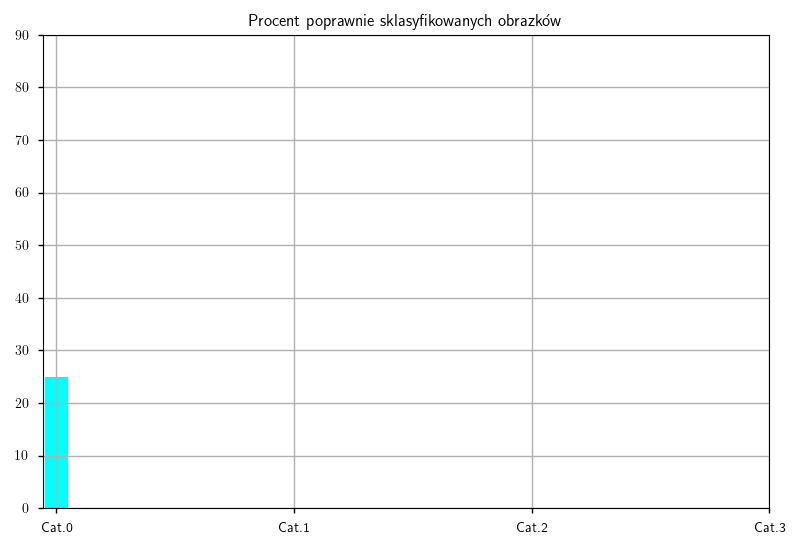

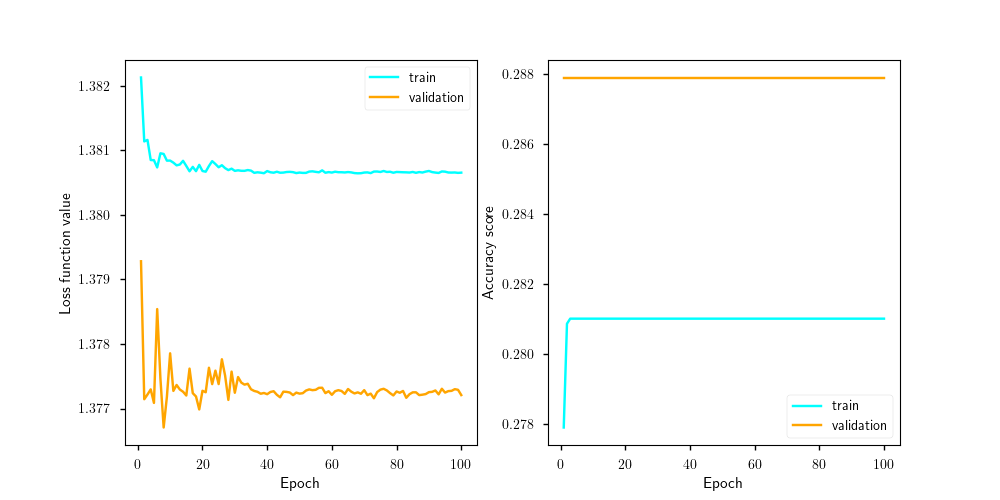

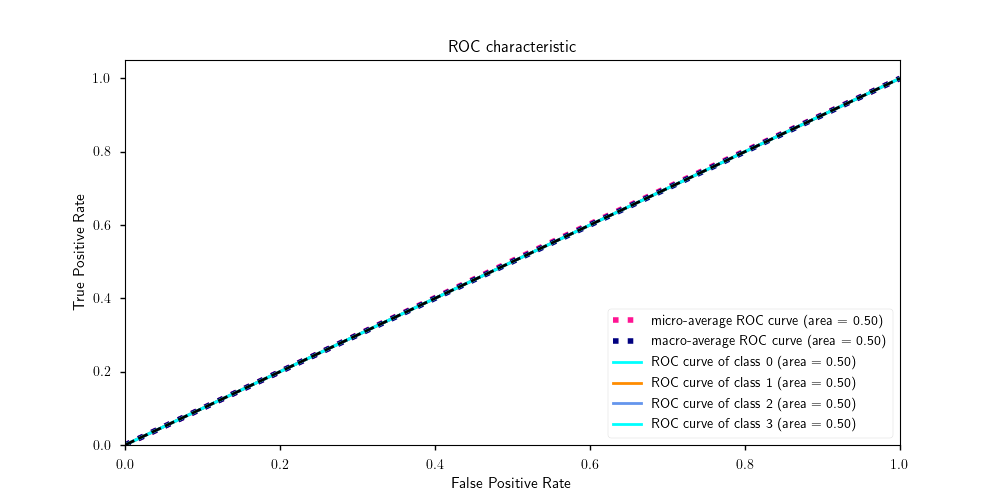

In [48]:
aux.plotTrainingHistory(model_C_fit)
aux.printScores(model_C, X_test,  Y_test)
aux.plotHistScores(model_C, X_test,  Y_test)
ROC_1 = aux.roc_auc(model_C, X_test,  Y_test, title="ROC characteristic")

# Code linting

In [49]:
!black Raw_Data

All done! ✨ 🍰 ✨
11 files left unchanged.


In [50]:
!black auxiliary_funcs.py

reformatted auxiliary_funcs.py

All done! ✨ 🍰 ✨
1 file reformatted.
